# Data Analysis and Visualisation
## 1. Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft
from scipy import signal

import import_ipynb
from util import *

importing Jupyter notebook from util.ipynb


## 2. Global Parameters

In [2]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

# Default mappings
df_column_mapping = {
    'x' : 3,
    'y' : 4,
    'z' : 5
}
axis_listing = ['x', 'y', 'z']

# Frequency presets
fs = 512 # sampling frequency
cutoff = 10 # cut-off frequency

## 3. Data Wrangling and Analysis

### 3.1 Data Import 

In [3]:
# ======================================================================
# Edit the input variable below to change to the folder path of interest
# ======================================================================
working_path = get_folder_path("Handgrip")

# File and directory management
os.chdir(working_path)
directory = os.listdir()
file = 'hgrip-lvl0-try3-forearm_Metawear_2019-11-10T16.34.00.327_C5013CAC38C1_Gyroscope_1.4.5.csv'
df = read_csv_file(file)
df.head()

os.chdir('..')

### 3.2 Handgrip Gesture - Lvl 0 - Gyroscope - Data Analysis

In [4]:
df.head()

,epoch (ms),time (-00:00),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
0,1573403640225,2019-11-10T16:34:00.225,0.000,-0.274,-0.724,-0.091
1,1573403640246,2019-11-10T16:34:00.246,0.021,-0.614,-1.021,0.042
2,1573403640265,2019-11-10T16:34:00.265,0.040,-0.313,-2.123,-0.126
3,1573403640286,2019-11-10T16:34:00.286,0.061,-0.114,-2.652,-0.076
4,1573403640306,2019-11-10T16:34:00.306,0.081,-0.149,-3.072,-0.347


In [5]:
df.describe()

,epoch (ms),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
count,5.367000e+03,5367.000000,5367.000000,5367.000000,5367.000000
mean,1.573404e+12,53.876669,-0.418491,-0.792514,-0.470682
std,3.111406e+04,31.114059,6.497880,17.644423,6.676871
min,1.573404e+12,0.000000,-44.276000,-112.424000,-29.207000
25%,1.573404e+12,26.939000,-1.682500,-3.634000,-1.955000
50%,1.573404e+12,53.877000,-0.514000,-0.713000,-0.423000
75%,1.573404e+12,80.814500,0.330000,1.500000,0.575000
max,1.573404e+12,107.753000,32.847000,124.874000,42.912000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5367 entries, 0 to 5366
Data columns (total 6 columns):
epoch (ms)        5367 non-null int64
time (-00:00)     5367 non-null object
elapsed (s)       5367 non-null float64
x-axis (deg/s)    5367 non-null float64
y-axis (deg/s)    5367 non-null float64
z-axis (deg/s)    5367 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 251.7+ KB


In [7]:
df.columns

Index(['epoch (ms)', 'time (-00:00)', 'elapsed (s)', 'x-axis (deg/s)',
       'y-axis (deg/s)', 'z-axis (deg/s)'],
      dtype='object')

### 3.3 Dataframe Extraction

In [8]:
x_axis_data = df['x-axis (deg/s)']
y_axis_data = df['y-axis (deg/s)']
z_axis_data = df['z-axis (deg/s)']
elapsed_time_data = df['elapsed (s)']
df_selected_time = df.loc[df['elapsed (s)'].between(50, 90)]
# df = df[df['closing_price'].between(99, 101)]
# PM10_conc_below_16 = PM10_Data.loc[PM10_Data['Value'] < 16]

#### 3.3.1 Filtered Gyroscope Data (between 50 - 90 seconds)

In [9]:
df_selected_time.head()

,epoch (ms),time (-00:00),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
2490,1573403690226,2019-11-10T16:34:50.226,50.001,0.152,-0.248,-1.048
2491,1573403690247,2019-11-10T16:34:50.247,50.022,0.244,1.208,-0.556
2492,1573403690266,2019-11-10T16:34:50.266,50.041,-0.008,-2.096,-0.579
2493,1573403690287,2019-11-10T16:34:50.287,50.062,-0.236,-3.194,-0.415
2494,1573403690307,2019-11-10T16:34:50.307,50.082,0.000,-0.621,-0.103


In [10]:
df_selected_time.describe()

,epoch (ms),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,1.573404e+12,69.991297,-0.355545,-0.499777,-0.260059
std,1.154996e+04,11.549963,9.926584,27.665507,10.221010
min,1.573404e+12,50.001000,-44.276000,-112.424000,-29.207000
25%,1.573404e+12,59.995250,-5.616750,-15.463500,-6.775000
50%,1.573404e+12,69.991500,-0.928000,-1.717000,-1.250000
75%,1.573404e+12,79.986000,4.843750,10.339000,4.669500
max,1.573404e+12,89.981000,32.847000,124.874000,42.912000


#### 3.3.2 Frequency domain of filtered data

In [11]:
# Create mapping lists
select_cols=[3, 4, 5]
labels=['x','y','z']

lgth, num_signal=df_selected_time.shape
fqy = np.zeros([lgth, num_signal])

# Perform FFT on data and store in matrix
for idx, col in enumerate(select_cols): 
    fqy[:,idx] = np.abs(fft(df_selected_time.iloc[:, col]))

index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))

fqy_x = fqy[0:int(lgth/2),0]
fqy_y = fqy[0:int(lgth/2),1]
fqy_z = fqy[0:int(lgth/2),2]

df_freq = pd.DataFrame({'x-axis (deg/s)' : fqy_x, 'y-axis (deg/s)' : fqy_y, 'z-axis (deg/s)' : fqy_z})

In [12]:
df_freq.head()

,x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
0,708.245000,995.555000,518.038000
1,179.068119,108.092654,133.210473
2,30.606237,178.105404,240.838414
3,186.228997,172.566604,165.137104
4,135.596050,579.373163,129.121692


### Gyroscope Data in the Frequency Domain - Statistical Analysis

In [13]:
df_freq.describe()

,x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
count,996.000000,996.000000,996.000000
mean,314.572051,976.822906,332.208294
std,312.754565,755.809831,313.053369
min,3.394142,8.820858,3.526364
25%,149.235842,450.715286,113.000626
50%,243.991848,807.542467,249.659609
75%,365.189002,1328.864410,439.757689
max,3261.471266,6839.816682,2566.447335


### 3.4 Data Visualisation of Filtered Data

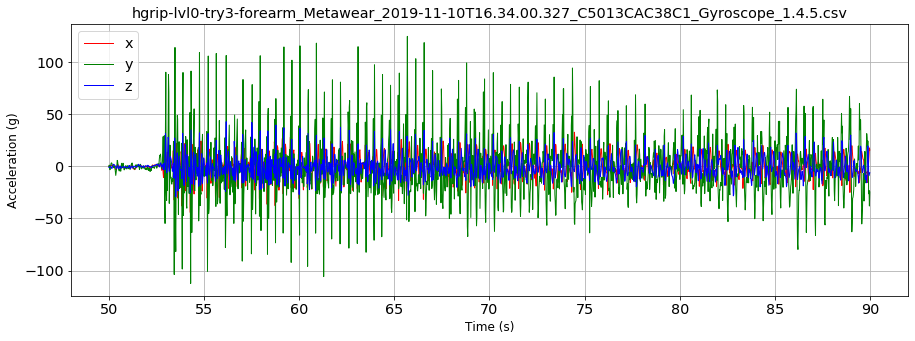

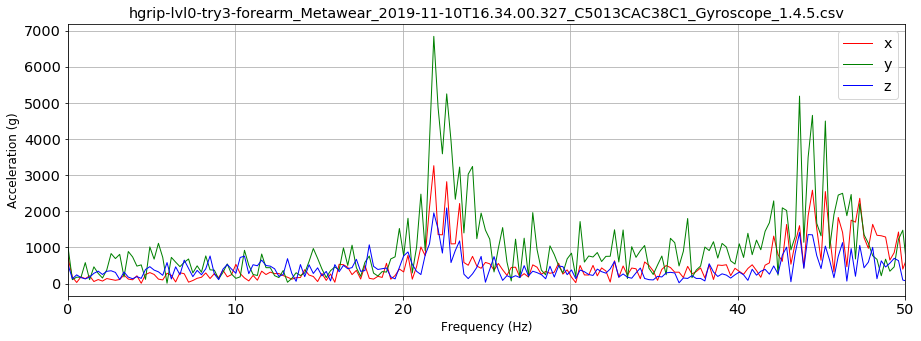

In [14]:
pylab.rcParams.update(params)
plot_time_3_axes(df_selected_time, t = file)
plot_frequency(df_selected_time, fs, t = file)

## 4. Data Visualisation

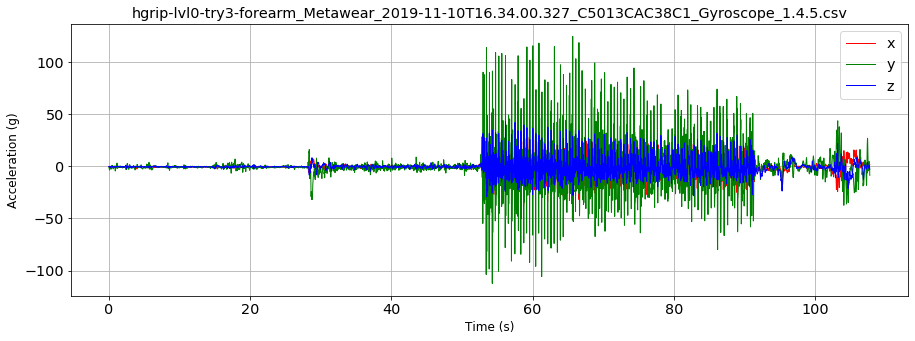

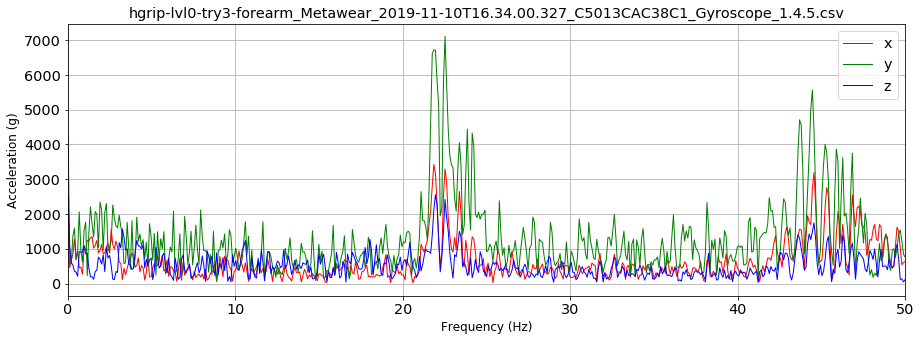

In [15]:
plot_time_3_axes(df, t = file)
plot_frequency(df, fs, t = file)

In [16]:
# # ======================================================================
# # Edit the input variable below to change to the folder path of interest
# # ======================================================================
# working_path = get_folder_path("Handgrip")

# # File and directory management
# os.chdir(working_path)
# directory = os.listdir()

# for file in directory:
#     df = read_csv_file(file)
    
#     if df is None:
#         continue
    
#     # Update plot customisation parameters
#     pylab.rcParams.update(params)

#     # ==============================================
#     # Default Plots
#     # ==============================================
#     # plot_in_3d(df, t = file)
#     plot_time_3_axes(df, t = file)
#     plot_frequency(df, fs, t = file)

#     # Uncomment sections below to enable plots of interest
#     """
#     # ==============================================
#     # Filtered Signals - Data Pre-processing
#     # ==============================================
#     median_data=median_filter(df, 155)
#     lpf_data=freq_filter(df, 155, cutoff/fs)
#     comb_data=freq_filter_recursive(median_data, 155, cutoff/fs)
#     """

#     """
#     # ==============================================
#     # Low Pass Filter Plots
#     # ==============================================
#     plot_time_3_axes(lpf_data, t = "LPF: " + file)
#     plot_frequency_recursive(lpf_data, fs, t = "LPF: " + file)
#     """
    
#     """
#     # ==============================================
#     # Median Pass Filter Plots
#     # ==============================================
#     plot_time_3_axes(median_data, t = "Median Filter: " + file)
#     plot_frequency_recursive(median_data, fs, t = "Median Filter: " + file)
#     """

#     """
#     # ==============================================
#     # Combined (Low + Median) Pass Filter Plots
#     # ==============================================
#     plot_time_3_axes(comb_data, t = "Combined Filter: " + file)
#     plot_frequency_recursive(comb_data, fs, t = "Combined Filter: " + file)
#     """
#     """
#     # ==============================================
#     # Integrated Signals Plots
#     # ==============================================
#     integrated_data = acc_integration(df)
#     plot_time_3_axes(integrated_data, t = "Integrated Signal (Velocity): " + file)
#     """
    
# os.chdir('..')